# Section 1

In [ ]:
# required
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# optional
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# set random seeds
tf.random.set_seed(2830)
np.random.seed(2830)

# Section 2

In [ ]:
# Generate data
gt1_X = np.random.normal(0, 1, (5000, 10))
gt1_formula = np.array([5, 7, -2, -8, 6, 0, 0, 0, 0, 0])
gt1_y = gt1_X @ gt1_formula

# Display data
data = np.concatenate(([gt1_y], gt1_X.T)).T
pd.DataFrame(data = data, columns=['y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'])

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-29.579884,0.110259,-3.087969,-0.749043,0.741277,-0.680544,1.606849,-0.886237,0.350773,-0.660441,-0.478209
1,-13.763301,-1.569348,-0.457992,-0.842859,-0.553458,-1.470666,0.018171,-0.660271,0.032087,0.230016,0.476304
2,-13.960092,0.509020,-0.130932,-0.276566,0.750972,-1.689004,0.895822,-1.195788,-1.034214,-0.682326,-0.010970
3,15.574768,0.188936,0.191017,-0.021699,-0.974294,0.909203,-0.436864,-0.062763,0.452257,0.365630,2.221494
4,-14.039647,-0.352854,-1.367789,-0.502583,-0.130065,-0.791091,1.052765,-0.617383,1.138698,0.763146,0.712855
...,...,...,...,...,...,...,...,...,...,...,...
4995,-41.730001,-3.352557,-2.199746,0.232695,1.063709,-0.098989,-0.079993,-0.507020,-0.167480,0.673237,-0.183843
4996,4.336776,-1.303663,0.894147,-1.232762,0.407786,0.898804,0.486421,0.402548,0.184502,1.352848,-0.068635
4997,3.695040,-0.237059,-0.858211,-1.545280,-1.292601,-0.423925,0.280444,1.541521,-0.209176,-0.506965,-1.353489
4998,-36.757490,1.111864,-2.689389,-1.455068,1.597248,-2.270539,-1.321694,-2.020146,-0.088073,-0.773675,1.641832


# Section 3

In [ ]:
# Build, compile, and train gt1_model1
gt1_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

gt1_model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.MSE,
)

gt1_model1.fit(gt1_X, gt1_y, epochs=15)


Epoch 1/15
157/157 [==============================] - 1s 1ms/step - loss: 27.6396
Epoch 2/15
157/157 [==============================] - 0s 2ms/step - loss: 0.4053
Epoch 3/15
157/157 [==============================] - 0s 1ms/step - loss: 0.1390
Epoch 4/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 5/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 6/15
157/157 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 7/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 8/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 9/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 10/15
157/157 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 11/15
157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 12/15
157/157 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 13/15
157/157 [===

# Section 4

In [ ]:
#Define draw_MLP function
def draw_MLP(layer_sizes, weights=None, inter_neuron_dist=5, inter_layer_dist=30, neuron_radius=0.3,
             neuron_fill=True, neuron_color="black", synapse_colors=["C0", "C0"], line_width_multiplier=0.5,
             first_layer_is_input=True, text_distance=25):
    """Draw a simple MLP network where the synapse strengths are represented as line-widths
    
    Note: If weights is None, each line is drawn with uniform width.
    Note: Default aesthetic values are suited to networks with ~16 neurons in each layer.
    
    params:
        layer_sizes -- list of the # of neurons in each layer (including input and output), e.g. [10, 16, 16, 1]
        weights -- list, containing 2D numpy arrays from a neural net object representing the weights of an MLP
        (aesthetic) inter_neuron_dist -- float, the horizontal distance between neurons in the same layer
        (aesthetic) inter_layer_dist -- float, the verticle distance between layers
        (aesthetic) neuron_radius -- float, neuron radius
        (aesthetic) neuron_fill -- boolean, whether or not to fill the circles representing neurons
        (aesthetic) neuron_color -- str, color of the neurons
        (aesthetic) synapse_colors -- list, colors for the synapses (positive weights get one and negatives another)
        (aesthetic) line_width_multiplier -- float, multiplied with weights to get matplotlib line width
        (aesthetic) first_layer_is_input -- boolean, whether the first layer is input, used only for label drawing
        (aesthetic) text_distance -- int, the distance between the label and the first neuron in each layer
    returns:
        None
    side-effects:
        Displays a matplotlib figure
    """
    # some basic variables
    largest_layer_size = max(layer_sizes)
    previous_layer = {} # stores neuron positions in previous layer for synapse drawing
    current_layer = {}
    current_x = 0
    current_y = 0
    
    # a helper for centering layers
    def get_left_margin(layer_size):
        """Calculate left margin so layer is centered relative to entire graph"""
        return inter_neuron_dist * (largest_layer_size-layer_size) / 2 + text_distance
    
    # start from the first layer
    current_x = get_left_margin(layer_sizes[0])
    
    # draw ONLY the neurons in the first layer
    for neuron_number in range(layer_sizes[0]):
        # use a matplotlib circle to represent each neuron
        circle = plt.Circle((current_x, current_y), radius=neuron_radius, color=neuron_color, fill=neuron_fill)
        plt.gca().add_patch(circle)
        
        previous_layer[neuron_number] = (current_x, current_y)
        current_x += inter_neuron_dist
        
    current_y += inter_layer_dist
    
    # draw subsequent layers, start from index 1 and end at last layer index
    for layer_number in range(1, len(layer_sizes)):
        current_x = get_left_margin(layer_sizes[layer_number])
        
        for neuron_number in range(layer_sizes[layer_number]):
            # draw the neuron itself
            circle = plt.Circle((current_x, current_y), radius=neuron_radius, color=neuron_color, fill=neuron_fill)
            plt.gca().add_patch(circle)
            
            # draw the synapses to neurons in the previous layer
            for earlier_neuron_number in previous_layer.keys():
                # get position of earlier neuron
                earlier_neuron_pos = previous_layer[earlier_neuron_number]
                
                # get line width based on synapse strength
                width = weights[layer_number-1][earlier_neuron_number, neuron_number]*line_width_multiplier if weights is not None else 0.5
                
                # draw the line
                x_data = (earlier_neuron_pos[0], current_x)
                y_data = (earlier_neuron_pos[1]+neuron_radius, current_y-neuron_radius)
                plt.plot(x_data, y_data, color=synapse_colors[0] if width >= 0 else synapse_colors[1], linewidth=width)
            
            current_layer[neuron_number] = (current_x, current_y)
            current_x += inter_neuron_dist
        
        current_y += inter_layer_dist
        previous_layer = current_layer
        current_layer = {}
    
    # time to add in some labels
    layer_labels = []
    
    if first_layer_is_input:
        layer_labels = ["Input Layer"] + [f"Hidden Layer {i+1}" for i in range(len(layer_sizes)-2)] + ["Output Layer"]
    else:
        layer_labels = [f"Hidden Layer {i+1}" for i in range(len(layer_sizes)-1)] + ["Output Layer"]
    
    current_y = 0
    for layer_label in layer_labels:
        plt.text(0, current_y, layer_label, fontdict={"size":5})
        current_y += inter_layer_dist
    
    # configure the plot axes and show!
    plt.axis("scaled")
    plt.axis("off")
    plt.show()

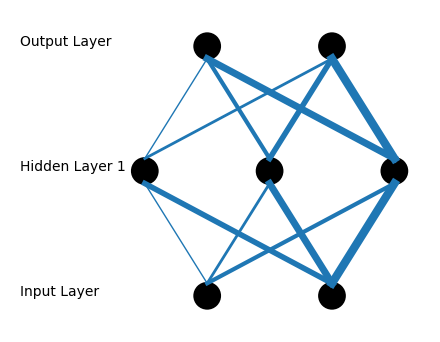

In [ ]:
#Example use of draw_MLP function
first_weight_matrix = np.array([[1, 2, -3],
                                [4, 5, -6]])
second_weight_matrix = np.array([[1, 2],
                                 [-3, 4],
                                 [5, -6]])

plt.figure(figsize=(2,2))
draw_MLP(layer_sizes=[2,3,2],
         weights=[first_weight_matrix, second_weight_matrix],
         inter_layer_dist=5,
         neuron_radius=0.5,
         text_distance=5)

Part a)

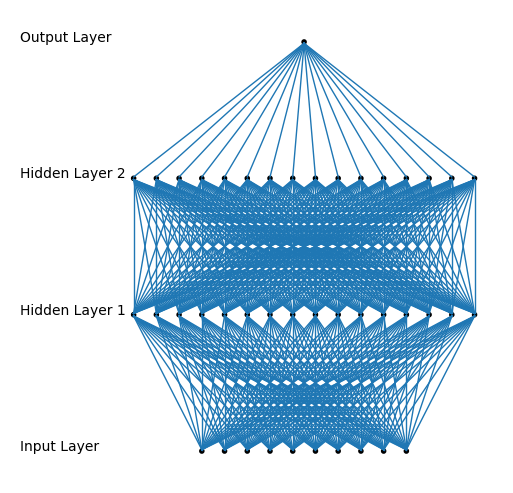

In [ ]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"]= 200

plt.figure(figsize=(3,3)) # tweak the size values here until it looks good on your own screen
draw_MLP(layer_sizes=[10, 16, 16, 1], weights=None)

Part b)

In [ ]:
# Define function to get a model's layer sizes and weights
def parse_tf_weights(model, include_input_layer=True):
    """Get the layer-sizes and weights of a tf.keras.Model or tf.Module with fully-connected layers only.
    
    params:
        model -- the tf.keras.Model from which to get layer-sizes and weights
        include_input_layer -- boolean, default True, whether to include the input layer (in case it is really large and clutters the plot)
    returns:
        layer_sizes -- a list of ints of layer sizes
        weights -- a list of matrices of weights
    """
    layer_sizes = []
    weights = []
    
    ### YOUR CODE ###
    # For each non-output layer, measure layer size. Get weights for the layers.
    if include_input_layer == True:
      for i in range(0, len(model.layers)):
        layer_sizes.append(len(list(model.weights[2*i])))
        weights.append(np.array(model.weights[2*i]))
    
    else:
      for i in range(1, len(model.layers)):
        layer_sizes.append(len(list(model.weights[2*i])))
        weights.append(np.array(model.weights[2*i]))
    
    # Get layer size for output layer
    layer_sizes.append(len(list(model.weights[2*len(model.layers)-1])))

    return layer_sizes, weights

Part c)

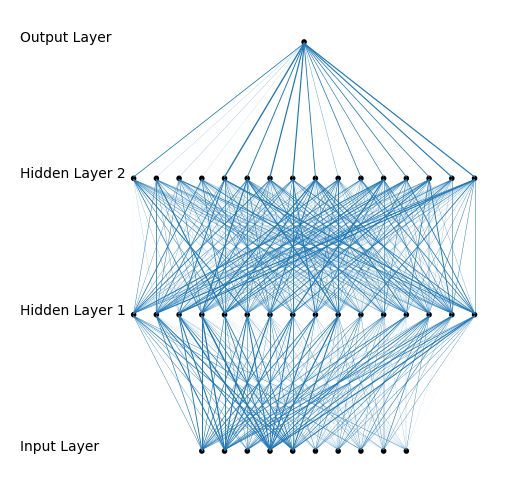

In [ ]:
# Get layer sizes and weights of gt1_model1
gt1_model1_l, gt1_model1_w = parse_tf_weights(gt1_model1)

# Draw gt1_model1
plt.figure(figsize=(3,3))
draw_MLP(layer_sizes = gt1_model1_l, weights = gt1_model1_w)

# Section 5

Part a)

In [ ]:
# Build, compile, and train gt1_model2
gt1_model2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation='linear')
])

gt1_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.MSE,
)

gt1_model2.fit(gt1_X, gt1_y, epochs=10, verbose=2)


Epoch 1/10
157/157 - 0s - loss: 146.7488 - 448ms/epoch - 3ms/step
Epoch 2/10
157/157 - 0s - loss: 89.8832 - 154ms/epoch - 984us/step
Epoch 3/10
157/157 - 0s - loss: 52.5335 - 151ms/epoch - 965us/step
Epoch 4/10
157/157 - 0s - loss: 29.1650 - 155ms/epoch - 987us/step
Epoch 5/10
157/157 - 0s - loss: 15.3486 - 157ms/epoch - 1ms/step
Epoch 6/10
157/157 - 0s - loss: 7.6108 - 171ms/epoch - 1ms/step
Epoch 7/10
157/157 - 0s - loss: 3.5425 - 153ms/epoch - 972us/step
Epoch 8/10
157/157 - 0s - loss: 1.5402 - 164ms/epoch - 1ms/step
Epoch 9/10
157/157 - 0s - loss: 0.6235 - 165ms/epoch - 1ms/step
Epoch 10/10
157/157 - 0s - loss: 0.2338 - 167ms/epoch - 1ms/step


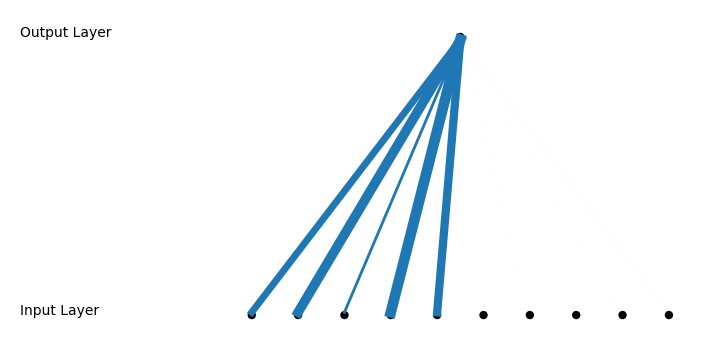

In [ ]:
# Get layer sizes and weights of gt1_model2
gt1_model2_l, gt1_model2_w = parse_tf_weights(gt1_model2)

# Draw gt1_model2
plt.figure(figsize=(3,3))
draw_MLP(layer_sizes = gt1_model2_l, weights = gt1_model2_w)

The model that I got was very close to the ground truth formula, where x6 to x10 values do not influence the final output.

Part b)

In [ ]:
# Build, compile and train gt1_model3
gt1_model3 = tf.keras.Sequential([
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(1, activation='linear')
])

gt1_model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.MSE,
)

gt1_model3.fit(gt1_X, gt1_y, epochs=15, verbose=2)



Epoch 1/15
157/157 - 0s - loss: 52.6632 - 488ms/epoch - 3ms/step
Epoch 2/15
157/157 - 0s - loss: 1.2089 - 164ms/epoch - 1ms/step
Epoch 3/15
157/157 - 0s - loss: 0.5782 - 162ms/epoch - 1ms/step
Epoch 4/15
157/157 - 0s - loss: 0.2442 - 166ms/epoch - 1ms/step
Epoch 5/15
157/157 - 0s - loss: 0.1149 - 173ms/epoch - 1ms/step
Epoch 6/15
157/157 - 0s - loss: 0.0678 - 165ms/epoch - 1ms/step
Epoch 7/15
157/157 - 0s - loss: 0.0434 - 170ms/epoch - 1ms/step
Epoch 8/15
157/157 - 0s - loss: 0.0282 - 159ms/epoch - 1ms/step
Epoch 9/15
157/157 - 0s - loss: 0.0186 - 181ms/epoch - 1ms/step
Epoch 10/15
157/157 - 0s - loss: 0.0120 - 179ms/epoch - 1ms/step
Epoch 11/15
157/157 - 0s - loss: 0.0084 - 182ms/epoch - 1ms/step
Epoch 12/15
157/157 - 0s - loss: 0.0058 - 206ms/epoch - 1ms/step
Epoch 13/15
157/157 - 0s - loss: 0.0042 - 158ms/epoch - 1ms/step
Epoch 14/15
157/157 - 0s - loss: 0.0029 - 167ms/epoch - 1ms/step
Epoch 15/15
157/157 - 0s - loss: 0.0019 - 162ms/epoch - 1ms/step


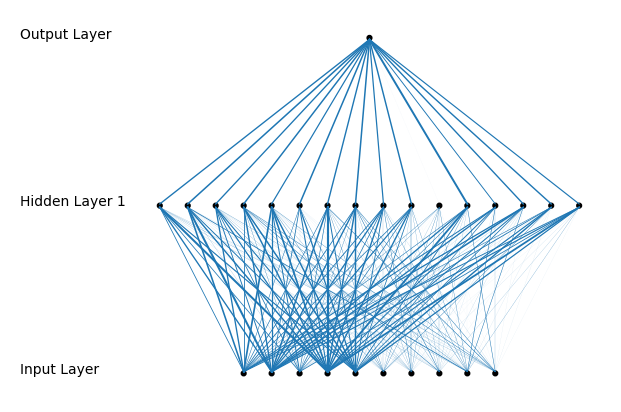

In [ ]:
# Get layer sizes and weights of gt1_model3
gt1_model3_l, gt1_model3_w = parse_tf_weights(gt1_model3)

# Draw gt1_model3
plt.figure(figsize=(3,3))
draw_MLP(layer_sizes = gt1_model3_l, weights = gt1_model3_w)

After introducing a hidden layer, x6 to x10 values begin to influence the final output. I think this could be showing us that the model is overly complicated and is overfitting the data by picking up on random patterns in the training data (e.g. if entries with high x6 to x10 values happened to have high y values)

Part c)

In [ ]:
#Create a, a2, a100
a = np.array(gt1_X[0])
a2 = np.array([a[0], a[1], a[2], a[3], a[4], 2*a[5], 2*a[6], 2*a[7], 2*a[8], 2*a[9]])
a100 = np.array([a[0], a[1], a[2], a[3], a[4], 100*a[5], 100*a[6], 100*a[7], 100*a[8], 100*a[9]])

a = np.array([a])
a2 = np.array([a2])
a100 = np.array([a100])


In [ ]:
# Pass a, a2, and a100 into gt1_model3 
gt1_model3.predict(a)

array([[-29.574293]], dtype=float32)

In [ ]:
gt1_model3.predict(a2)

array([[-29.556234]], dtype=float32)

In [ ]:
gt1_model3.predict(a100)

array([[-27.661528]], dtype=float32)

The output changed slightly for a2, and slightly more significantly for a100. Overall, the change was minimal considering how dramatically x6 to x10 were altered. Though there being a change makes me slightly question the neural net, the scale of the change is reassuring.

Part d)

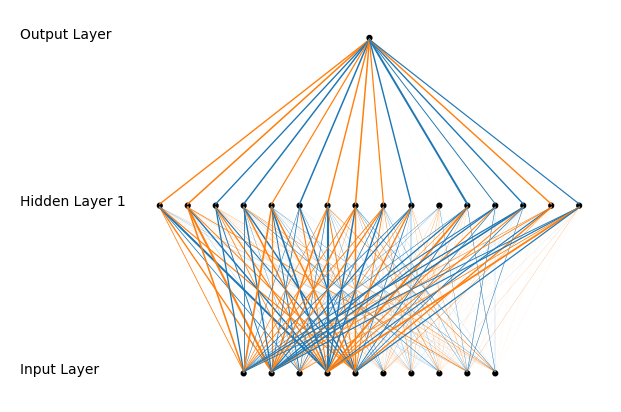

In [ ]:
# Draw gt1_model3, with color code for parity
plt.figure(figsize=(3,3))
draw_MLP(layer_sizes = gt1_model3_l, weights = gt1_model3_w, synapse_colors=['C0','C1'])

The (unnecessary) weights for x6 to x10 are a mix of positive and negative values. This causes contributions from x6 to x10 to cancel out down the road in the neural net.

# Section 6

Part a)

The first neural network with no hidden layers is exactly "sufficiently sophisticated" since the ground truth is just a linear combination. All of the networks with a hidden layer are "too sophisticated" (more sophisticated than necessary).

Part b)

Random chance determines which of these zero-loss configurations (local minimums) are found by training. The randomness is introduced in the weights initialization step where we choose a random position to begin gradient descent from.


Part c)

It would be much harder to train a network for which there is only one desirable configuration of weights compared to if there were many. Since it is up to random chance which local minimum the network converges to after gradient descent, if there was only one desirable configuration, in the vast majority of cases, we would converge to a loss that is too large/unsatisfactory. In the above example, I would add an additional hidden layer to introduce redundancy to make training easier. I would essentially be adding ways to get a very small loss so that it is easier for the neural network to find one of these solutions.